# New structure dataset
This notebook changes the folder structure for out dataset, we also choose to NOT balance the dataset.

<br><br><br>
# Libaries

In [98]:
# General libaries
import os, shutil
import pandas as pd
import numpy as np
import pickle
import copy

pd.set_option('max_colwidth', -1)
pd.set_option("display.max_rows", 100)

C:\Users\Paulo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


<br><br><br>
# Global variables

In [99]:
original_dataset_path = os.path.join(os.getcwd(), 'datasets', 'UTKface_inthewild')
new_directory = os.path.join(os.getcwd(), 'datasets', 'UTKface_inthewild-new-structure-imbalanced')

<br><br><br>
# Functions

In [100]:
def extract_all_files(path):
    """
    This function extracts al the files within a specific path.
    """

    all_files = []

    # Go through all the files in a our 'path' and extract all files
    # and add those file paths to our 'all_files' list.
    for (root,dirs,files) in os.walk(path, topdown=True): 
        if len(files) == 0: 
            continue

        else: 
            all_files.extend([os.path.join(root, file) for file in files])

    # Filter out the paths that include a jpg.
    all_files = [file for file in all_files 
                 if file.endswith('.jpg')]

    # Return the result
    return all_files



def create_data_frame_with_all_information_of_files(all_files):
    """
    This function walks through all_files and extracts all the relevant
    information.
    """  
    df = pd.DataFrame(columns = ['path'], data = all_files)
    
    df['split']    = df['path'].apply(lambda x: x.split('\\')[-1].split('_'))
    df             = df[df['split'].map(len) == 4]
    
    
    df['age']      = df['split'].apply(lambda x: x[0])
    df['gender']   = df['split'].apply(lambda x: x[1])
    df['race']     = df['split'].apply(lambda x: x[2])
    df['datetime'] = df['split'].apply(lambda x: x[3].split('.')[0])    
    
    df = df.drop(['split'], axis=1)
    
    return df[['age', 'gender', 'race', 'datetime', 'path']]

<br><br><br>
# Create dataframe

In [101]:
# Extract all the files of our dataset folder. This folder contains 3 subfolders
# with each containing parts of our dataset.
all_files = extract_all_files(original_dataset_path)
print('Lenght of the collected files from our path is: ', len(all_files))

Lenght of the collected files from our path is:  24106


In [102]:
# We use the image paths to create a dataframe containing all our data.
df = create_data_frame_with_all_information_of_files(all_files)

# Drop everything above 70 (just like a paper)
df['age'] = df['age'].astype('int')
df = df[df['age'] <= 70]

display(df.shape)
display(df.head())

(22837, 5)

,age,gender,race,datetime,path
4,10,0,0,20161220222308131,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20161220222308131.jpg
5,10,0,0,20170103200329407,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170103200329407.jpg
6,10,0,0,20170103200522151,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170103200522151.jpg
7,10,0,0,20170103233459275,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170103233459275.jpg
8,10,0,0,20170104013211746,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170104013211746.jpg


We see that the bins are not even.

(0, 10]     3492
(10, 20]    1682
(20, 30]    7806
(30, 40]    4345
(40, 50]    2103
(50, 60]    2226
(60, 70]    1183
Name: age-binned, dtype: int64 



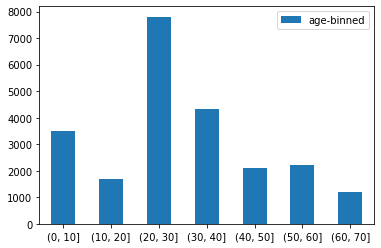

In [103]:
# Create bins
bins = [0, 10, 20, 30, 40, 50, 60, 70]

df['age-binned'] = pd.cut(df['age'], bins)

# Print results
print('We see that the bins are not even.\n')
print(df['age-binned'].value_counts().sort_index(), '\n')

pd.DataFrame(df['age-binned'].value_counts()).sort_index().plot.bar(rot=0)

In [104]:
# Pickle the result
with open('df-UTKface_inthewild-imbalanced.pkl', 'wb') as output_file:
    pickle.dump(df, output_file)

In [105]:
# Open saved pickle file and test the saved df.
with open('df-UTKface_inthewild-imbalanced.pkl', 'rb') as input_file:
    df = pickle.load(input_file)

display(df.shape)
df.head()

(22837, 6)

,age,gender,race,datetime,path,age-binned
4,10,0,0,20161220222308131,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20161220222308131.jpg,"(0, 10]"
5,10,0,0,20170103200329407,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170103200329407.jpg,"(0, 10]"
6,10,0,0,20170103200522151,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170103200522151.jpg,"(0, 10]"
7,10,0,0,20170103233459275,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170103233459275.jpg,"(0, 10]"
8,10,0,0,20170104013211746,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170104013211746.jpg,"(0, 10]"


<br><br><br>
# Create new folder structure

In [106]:
%%time

# Create folders for training, validation and testing
TRAINING_VALIDATION_TESTING_FOLDERS = ['training', 'validation', 'test']
TRAINING_VALIDATION_TESTING_FOLDERS = [os.path.join(new_directory, folder) for folder in TRAINING_VALIDATION_TESTING_FOLDERS]


# Creating all categories as folders
for new_folder in TRAINING_VALIDATION_TESTING_FOLDERS:
    try:
        os.mkdir(new_folder)
    except OSError:
        print ("Creation of the directory %s failed    \n\n" % new_folder)
    else:
        print ("Successfully created the directory %s  \n\n" % new_folder)

Successfully created the directory D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild-new-structure-imbalanced\training  


Successfully created the directory D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild-new-structure-imbalanced\validation  


Successfully created the directory D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild-new-structure-imbalanced\test  


Wall time: 2 ms


In [107]:
%%time

# Creating all categories as folders
CATEGORIES = bins[1:] # we dont include 0
TRAINING_CATEGORIES = [os.path.join(TRAINING_VALIDATION_TESTING_FOLDERS[0], str(CATEGORY)) for CATEGORY in CATEGORIES]
VALIDATION_CATEGORIES = [os.path.join(TRAINING_VALIDATION_TESTING_FOLDERS[1], str(CATEGORY)) for CATEGORY in CATEGORIES]
TEST_CATEGORIES = [os.path.join(TRAINING_VALIDATION_TESTING_FOLDERS[2], str(CATEGORY)) for CATEGORY in CATEGORIES]


for new_folder in TRAINING_CATEGORIES:
    try:
        os.mkdir(new_folder)
    except OSError:
        print("Creation of the directory %s failed    \n\n" % new_folder)

print('Finished with TRAINING_CATEGORIES')



for new_folder in VALIDATION_CATEGORIES:
    try:
        os.mkdir(new_folder)
    except OSError:
        print("Creation of the directory %s failed    \n\n" % new_folder)

print('Finished with VALIDATION_CATEGORIES')



for new_folder in TEST_CATEGORIES:
    try:
        os.mkdir(new_folder)
    except OSError:
        print("Creation of the directory %s failed    \n\n" % new_folder)

print('Finished with TEST_CATEGORIES')

Finished with TRAINING_CATEGORIES
Finished with VALIDATION_CATEGORIES
Finished with TEST_CATEGORIES
Wall time: 6 ms


In [108]:
df

,age,gender,race,datetime,path,age-binned
4,10,0,0,20161220222308131,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20161220222308131.jpg,"(0, 10]"
5,10,0,0,20170103200329407,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170103200329407.jpg,"(0, 10]"
6,10,0,0,20170103200522151,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170103200522151.jpg,"(0, 10]"
7,10,0,0,20170103233459275,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170103233459275.jpg,"(0, 10]"
8,10,0,0,20170104013211746,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part1\10_0_0_20170104013211746.jpg,"(0, 10]"
...,...,...,...,...,...,...
23985,7,1,1,20170116225209209,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part3\7_1_1_20170116225209209.jpg,"(0, 10]"
24080,8,1,0,20170117154607954,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part3\8_1_0_20170117154607954.jpg,"(0, 10]"
24081,8,1,0,20170120230542954,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part3\8_1_0_20170120230542954.jpg,"(0, 10]"
24104,9,0,0,20170120133313910,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild\part3\9_0_0_20170120133313910.jpg,"(0, 10]"


<br><br><br>
# Split data

In [109]:
# Random state that will be used to 'randomly' split the data into training, validation and test.
np.random.seed(1)

# Split the dataframe into train, validation and test
probs = np.random.rand(len(df))
training_mask = probs < 0.75
validation_mask = (probs>=0.75) & (probs < 0.95)
test_mask  = probs >= 0.95


df_training = df[training_mask]
df_validation = df[validation_mask]
df_test = df[test_mask]

print('Length training:   ', len(df_training))
print('Length validation: ', len(df_validation))
print('Length test:       ', len(df_test))

Length training:    17119
Length validation:  4641
Length test:        1077


In [110]:
# Check if the splitting up the dataframe was done correctly (if yes, then both df have one or more overlapping rows)
print('Overlapping paths in training and validation? Answer: ', bool(set(df_training['path']) & set(df_validation['path'])))
print('Overlapping paths in training and test? Answer:       ', bool(set(df_training['path']) & set(df_test['path'])))
print('Overlapping paths in validation and test? Answer:     ', bool(set(df_validation['path']) & set(df_test['path'])))

Overlapping paths in training and validation? Answer:  False
Overlapping paths in training and test? Answer:        False
Overlapping paths in validation and test? Answer:      False


df_training binned ages distribution


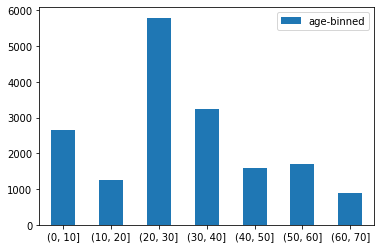

In [111]:
print('df_training binned ages distribution')
pd.DataFrame(df_training['age-binned'].value_counts()).sort_index().plot.bar(rot=0)

df_validation binned ages distribution


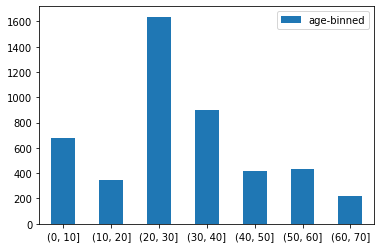

In [112]:
print('df_validation binned ages distribution')
pd.DataFrame(df_validation['age-binned'].value_counts()).sort_index().plot.bar(rot=0)

df_test binned ages distribution


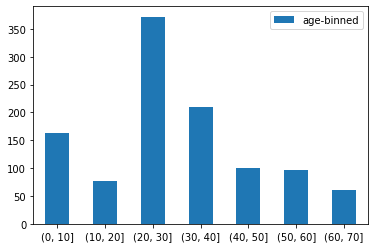

In [113]:
print('df_test binned ages distribution')
pd.DataFrame(df_test['age-binned'].value_counts()).sort_index().plot.bar(rot=0)

<br><br><br>
# Move images

In [114]:
def check_interval(x, intervals=df['age-binned'].unique()):
    if x in intervals[0]:
        return str(10)
    
    elif x in intervals[1]:
        return str(20)
    
    elif x in intervals[2]:
        return str(30)
    
    elif x in intervals[3]:
        return str(40)
    
    elif x in intervals[4]:
        return str(50)
    
    elif x in intervals[5]:
        return str(60)
    
    elif x in intervals[6]:
        return str(70)

In [115]:
TRAINING_PATH   = TRAINING_VALIDATION_TESTING_FOLDERS[0]
VALIDATION_PATH = TRAINING_VALIDATION_TESTING_FOLDERS[1]
TEST_PATH       = TRAINING_VALIDATION_TESTING_FOLDERS[2]

df_training['new-path']   = df_training['age'].apply(lambda x: os.path.join(TRAINING_PATH, check_interval(x)))
df_validation['new-path'] = df_validation['age'].apply(lambda x: os.path.join(VALIDATION_PATH, check_interval(x)))
df_test['new-path']       = df_test['age'].apply(lambda x: os.path.join(TEST_PATH, check_interval(x)))

C:\Users\Paulo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Paulo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Paulo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [116]:
# Combine the results to one dataframe
def correct_category(path):
    if 'training' in path:
        return 'training'
    
    elif 'validation' in path:
        return 'validation'
    
    elif 'test' in path:
        return 'test'
    
    else:
        return None
    
df = df_training.append(df_validation).append(df_test).sort_index()
df['category'] = df['new-path'].apply(lambda x: correct_category(x))
df['path'] = df['new-path']
df = df.drop(['new-path'], axis=1)
df = df[['age', 'age-binned', 'gender', 'race', 'datetime', 'category', 'path']]

display(df.head())


# Pickle the result
with open('df-UTKface_inthewild-imbalanced.pkl', 'wb') as output_file:
    pickle.dump(df, output_file)

,age,age-binned,gender,race,datetime,category,path
4,10,"(0, 10]",0,0,20161220222308131,training,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild-new-structure-imbalanced\training\10
5,10,"(0, 10]",0,0,20170103200329407,training,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild-new-structure-imbalanced\training\10
6,10,"(0, 10]",0,0,20170103200522151,training,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild-new-structure-imbalanced\training\10
7,10,"(0, 10]",0,0,20170103233459275,training,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild-new-structure-imbalanced\training\10
8,10,"(0, 10]",0,0,20170104013211746,training,D:\Datamap Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_inthewild-new-structure-imbalanced\training\10


In [117]:
%%time 

# Move all the newly defined trainings data
for index, row in df_training.iterrows():
    shutil.copy(row['path'], row['new-path'])
    
# Move all the newly defined validation data
for index, row in df_validation.iterrows():
    shutil.copy(row['path'], row['new-path'])

# Move all the newly defined test data
for index, row in df_test.iterrows():
    shutil.copy(row['path'], row['new-path'])

Wall time: 52.3 s


In [118]:
# Extract all the files of our dataset folder. This folder contains 3 subfolders
# with each containing parts of our dataset.
all_files = extract_all_files(new_directory)
print('Lenght of the collected files from our path is: ', len(all_files))

Lenght of the collected files from our path is:  22837
